In [4]:
import torch
from torchvision import datasets, transforms
mnist_train = datasets.CIFAR10(
    root='/workspaces/cosc470/data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

mnist_test = datasets.CIFAR10(
    root='/workspaces/cosc470/data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)




tensor([[0.0751, 0.1207, 0.0954, 0.0794, 0.1318, 0.0907, 0.0821, 0.1099, 0.1157,
         0.0991]], grad_fn=<SoftmaxBackward0>)
tensor([[0.1019, 0.1043, 0.0965, 0.0900, 0.1133, 0.0963, 0.0905, 0.0995, 0.1067,
         0.1009]], grad_fn=<SoftmaxBackward0>)


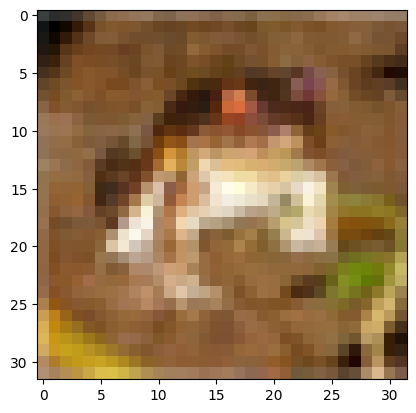

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5, bias=False)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(20 * 14 * 14, 100, bias=False)
        self.fc2 = nn.Linear(100, 10, bias=False)

    def forward(self, x):
        # relu function equation: z = Summation(w * x) + b (some form of this)
        # softmax function equation: softmax(z) =  1 / 1+e^(z) (some form of this as well)
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 20 * 14 * 14)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

model = SimpleCNN()
bad_prediction = model.forward(torch.randn(1,3,32,32))
print(bad_prediction)
real_image = mnist_train[0][0].unsqueeze(0)
#print(mnist_train)
import matplotlib.pyplot as plt
plt.imshow(mnist_train[0][0].permute(1, 2, 0))
untrained_prediction = model.forward(real_image)
print(untrained_prediction)



In [6]:
import time

batch_size = 10
learning_rate = 0.001
epochs = 20

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)



optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

start_time = time.time()
for epoch in range(20):
    running_loss = 0.0
    for images, labels in train_loader:
        #Foward
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")
end_time = time.time()
print(f"Time elapsed: {end_time - start_time:.2f} seconds")

correct = 0
start_time = time.time()
for testimage in mnist_test:
    a = testimage[0].unsqueeze(0)
    a = model.forward(a)
    if torch.argmax(a) == testimage[1]:
        correct += 1
    print(f"Test Accuracy: {100 * correct / len(mnist_test):.2f}%")
end_time = time.time()
print(f"Time elapsed: {end_time - start_time:.2f} seconds")


Epoch [1/20], Loss: 2.0979
Epoch [2/20], Loss: 1.9951
Epoch [3/20], Loss: 1.9546
Epoch [4/20], Loss: 1.9313
Epoch [5/20], Loss: 1.9178
Epoch [6/20], Loss: 1.9041
Epoch [7/20], Loss: 1.8961
Epoch [8/20], Loss: 1.8846
Epoch [9/20], Loss: 1.8808
Epoch [10/20], Loss: 1.8760
Epoch [11/20], Loss: 1.8685
Epoch [12/20], Loss: 1.8636
Epoch [13/20], Loss: 1.8570
Epoch [14/20], Loss: 1.8516
Epoch [15/20], Loss: 1.8526
Epoch [16/20], Loss: 1.8439
Epoch [17/20], Loss: 1.8394
Epoch [18/20], Loss: 1.8408
Epoch [19/20], Loss: 1.8359
Epoch [20/20], Loss: 1.8312
Time elapsed: 476.80 seconds
Test Accuracy: 0.00%
Test Accuracy: 0.00%
Test Accuracy: 0.00%
Test Accuracy: 0.01%
Test Accuracy: 0.02%
Test Accuracy: 0.03%
Test Accuracy: 0.03%
Test Accuracy: 0.04%
Test Accuracy: 0.05%
Test Accuracy: 0.06%
Test Accuracy: 0.06%
Test Accuracy: 0.07%
Test Accuracy: 0.08%
Test Accuracy: 0.09%
Test Accuracy: 0.10%
Test Accuracy: 0.10%
Test Accuracy: 0.11%
Test Accuracy: 0.11%
Test Accuracy: 0.12%
Test Accuracy: 0.13%


In [ ]:
## Define the CNN model
class AdvancedCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(AdvancedCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32 * 2, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32 * 2, out_channels=64 * 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64 * 2, out_channels=64 * 2, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64 * 2, out_channels=128 * 2, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=128 * 2, out_channels=128 * 2, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(in_channels=128 * 2, out_channels=128 * 2, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(in_channels=128 * 2, out_channels=256 * 2, kernel_size=3, padding=1)
        self.conv8 = nn.Conv2d(in_channels=256 * 2, out_channels=256 * 2, kernel_size=3, padding=1)
        self.conv9 = nn.Conv2d(in_channels=256 * 2, out_channels=256 * 2, kernel_size=3, padding=1)

        self.bn1 = nn.BatchNorm2d(32 * 2)
        self.bn2 = nn.BatchNorm2d(128 * 2)
        self.bn3 = nn.BatchNorm2d(256 * 2)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout2d(0.2)

        self.fc1 = nn.Linear(4096 * 2, 4096 * 2)
        self.fc2 = nn.Linear(4096 * 2, 2048 * 2)
        self.fc3 = nn.Linear(2048 * 2, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):

        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.maxpool(x)

        x = self.relu(self.bn2(self.conv4(x)))
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.maxpool(x)
        x = self.dropout(x)

        x = self.relu(self.bn3(self.conv7(x)))
        x = self.relu(self.conv8(x))
        x = self.relu(self.conv9(x))
        x = self.maxpool(x)
        x = self.dropout(x)

        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x